# MIS 545 Section 02
## German Credit History
<br>
<b>Group Members:</b><br>

* Ahana Singh 
* Parul Sharma
* Shweta Barge


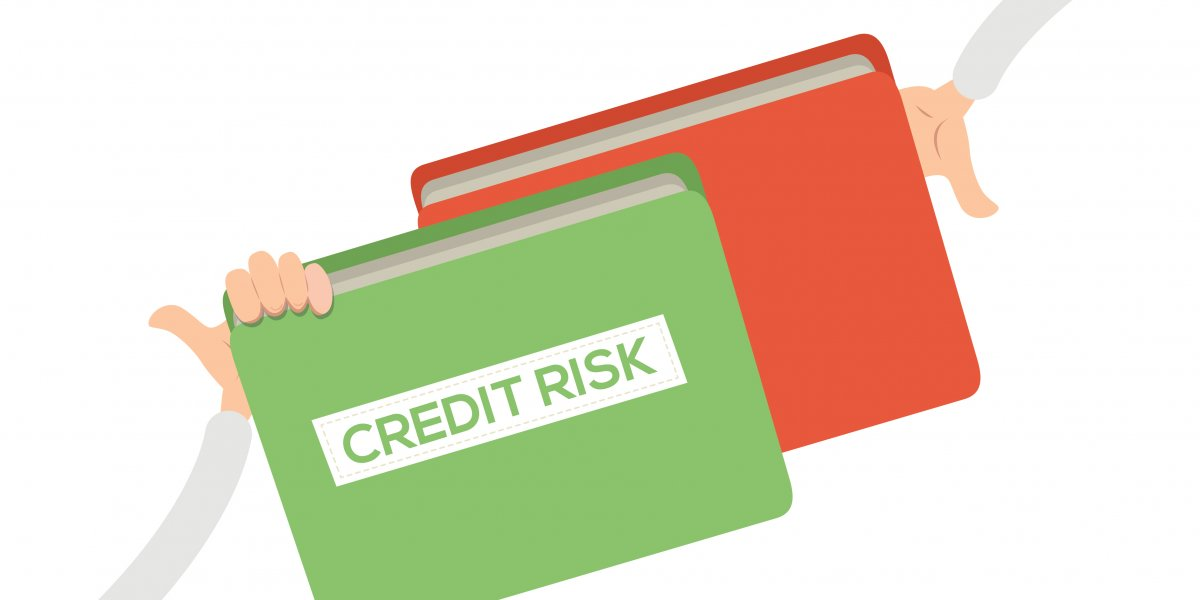

### Overall Hypothesis for the German Credit Dataset
**Null Hypothesis ($H_{o}$):** <br>The attributes and characteristics of individuals (such as employment duration, credit history, loan amount, personal status, age, etc.) do not provide significant predictive power to determine the credit risk of an individual. In other words, these features do not contribute meaningfully to the prediction of whether an individual poses a high or low credit risk.

**Alternative Hypothesis ($H_{1}$):**<br>The attributes and characteristics of individuals provide significant predictive power in determining an individual’s credit risk. This implies that a statistical relationship exists between these features and the individual's credit risk, and this relationship can be modeled to predict credit risk with a certain level of accuracy.

**Objective of the Models**<br>
The objective of employing various machine learning models (Logistic Regression, KNN, Decision Trees, Linear Regression, Multiple Regression, Naive Bayes, Random Forest, and Neural Networks) is to:

1. Test the Overall Hypothesis: By training these models on the dataset and evaluating their performance, we aim to test whether the features in the dataset can predict credit risk effectively. If one or more models perform significantly better than a baseline (like random guessing), it supports the alternative hypothesis.

2. Find the Most Suitable Model: Different models have different strengths and assumptions. By comparing a variety of models, we aim to identify which model(s) are most effective for this particular prediction task, given the nature of the data.

3. Understand Feature Relationships: Through model analysis, we can gain insights into how different features impact credit risk, which can be valuable for decision-making processes in credit risk assessment.

_In conclusion, the overarching goal is to ascertain the predictability of credit risk using the given features and to determine the most effective model(s) for such predictions. This process involves both model comparison and hypothesis testing regarding the relationship between features and the target variable._

In [31]:
# Importing Libraries

import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix

#### Loading the Dataset and Initial Check

In [32]:
# Load the dataset
credit_data = pd.read_csv(r'C:\Users\ual-laptop\Desktop\MIS\MIS 545\FinalProject\GermanCredit.csv')

# Display the first few rows of the dataframe
credit_data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,... < 100 DM,6,critical account/other credits existing,domestic appliances,1169,unknown/no savings account,... >= 7 years,4,male : single,none,...,real estate,67,none,own,2,skilled employee/official,1,yes,yes,1
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee/official,1,no,yes,0
2,no checking account,12,critical account/other credits existing,retraining,2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,...,real estate,49,none,own,1,unskilled - resident,2,no,yes,1
3,... < 100 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,...,building society savings agreement/life insurance,45,none,for free,1,skilled employee/official,2,no,yes,1
4,... < 100 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,...,unknown/no property,53,none,for free,2,skilled employee/official,2,no,yes,0


__________________________________________

## Data Cleaning and Pre-processing
_________________________________________________

#### Checking for Missing Values and Data Types
<p>
From the below code snippet and it's output, we can see that there is no missing data.

In [33]:
# Checking for missing values
missing_values = credit_data.isnull().sum()

# Checking data types
data_types = credit_data.dtypes

print(missing_values)
print(data_types)

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64
status                     object
duration                    int64
credit_history             object
purpose                    object
amount                      int64
savings                    object
employment_duration        object
installment_rate            int64
personal_status_sex        object
other_debtors              object
present_residence           int64
prop

### One-Hot Encoding of Categorical Variables

In [34]:
# Selecting categorical columns for one-hot encoding
categorical_columns = credit_data.select_dtypes(include=['object']).columns

# Applying one-hot encoding
encoder = OneHotEncoder(sparse=False) # Dense Array
encoded_data = encoder.fit_transform(credit_data[categorical_columns])

# Creating a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

# Dropping the original categorical columns and concatenating the new encoded columns
credit_data_cleaned = credit_data.drop(categorical_columns, axis=1)
credit_data_cleaned = pd.concat([credit_data_cleaned, encoded_df], axis=1)

print(encoded_df.columns)

Index(['status_... < 100 DM',
       'status_... >= 200 DM / salary for at least 1 year',
       'status_0 <= ... < 200 DM', 'status_no checking account',
       'credit_history_all credits at this bank paid back duly',
       'credit_history_critical account/other credits existing',
       'credit_history_delay in paying off in the past',
       'credit_history_existing credits paid back duly till now',
       'credit_history_no credits taken/all credits paid back duly',
       'purpose_business', 'purpose_car (new)', 'purpose_car (used)',
       'purpose_domestic appliances', 'purpose_education',
       'purpose_furniture/equipment', 'purpose_others',
       'purpose_radio/television', 'purpose_repairs', 'purpose_retraining',
       'savings_... < 100 DM', 'savings_... >= 1000 DM',
       'savings_100 <= ... < 500 DM', 'savings_500 <= ... < 1000 DM',
       'savings_unknown/no savings account',
       'employment_duration_... < 1 year',
       'employment_duration_... >= 7 years',
  

c:\Users\ual-laptop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Handling Outliers

In [35]:
# Function to detect and handle outliers using IQR
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Handling outliers by capping
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Columns to check for outliers
numerical_columns = ['duration', 'amount', 'age']

# Applying outlier handling for each numerical column
for column in numerical_columns:
    credit_data_cleaned = handle_outliers(credit_data_cleaned, column)


In [36]:
# Saving the cleaned data to a CSV file
credit_data_cleaned.to_csv(r'C:\Users\ual-laptop\Desktop\MIS\MIS 545\FinalProject\Cleaned_GermanCredit.csv', index=False)

___________________________________________________
## Data Preperation
_______________________________________________________

In [37]:
# Load the cleaned data
cleaned_data = pd.read_csv(r'C:\Users\ual-laptop\Desktop\MIS\MIS 545\FinalProject\Cleaned_GermanCredit.csv')  # Replace with your file path

# Separating the features and the target variable
X = cleaned_data.drop('credit_risk', axis=1)  # Features
y = cleaned_data['credit_risk']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


___________________________________
## Training Models
___________________________________

### 1. Logistic Regression

Logistic regression is a statistical model that uses the logistic function, or logit function, in mathematics as the equation between x and y. The logit function maps y as a sigmoid function of x.
<center>

$\sigma(x) = \frac{1} {1 + e^{-x}}$ 



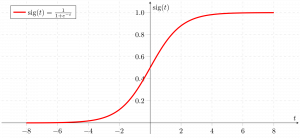


_______________________________________________________________
**Null Hypothesis ($H_0$):** The features (like credit history, duration, amount, etc.) have no relationship with the likelihood of credit risk.<p>
**Alternative Hypothesis ($H_1$):** The features have a significant relationship with the likelihood of credit risk, and a logistic regression model can effectively capture this relationship.


Accuracy of Logisitic regression model is: 0.77

Confusion Matrix: 
[[ 30  29]
 [ 17 124]]


<Axes: >

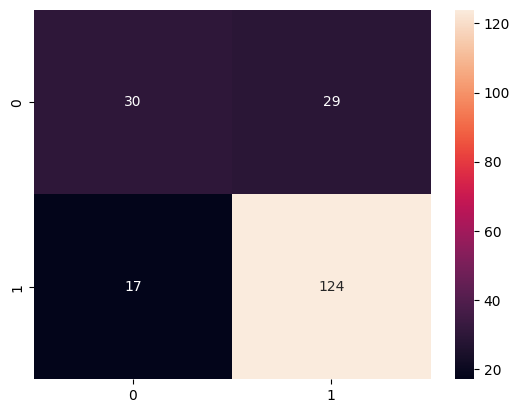

In [38]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
print("\nAccuracy of Logisitic regression model is:", log_reg_accuracy)

# calculating confusion matrix
log_reg_cm = confusion_matrix(y_test, log_reg_pred)
print("\nConfusion Matrix: ")
print(log_reg_cm)

# visualizing confusion matrix
sns.heatmap(log_reg_cm, annot=True, fmt='d')




- True Positive (TP): The model correctly predicted instances of Class 1. In this case, it's 124.

- True Negative (TN): The model correctly predicted instances of Class 0. Here, it's 30.

- False Positive (FP): Also known as a Type I error. The model predicted Class 1, but the actual class was 0. In this case, it's 29.

- False Negative (FN): Also known as a Type II error. The model predicted Class 0, but the actual class was 1. Here, it's 17.

In [39]:
# calculate print accuracy for this logistic regression model
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
print("\nAccuracy of Logisitic regression model is:", log_reg_accuracy)

# calculate precision, recall and f1 scores
log_reg_report = classification_report(y_test, log_reg_pred)
print("\nClassification Report: ")
print(log_reg_report)



Accuracy of Logisitic regression model is: 0.77

Classification Report: 
              precision    recall  f1-score   support

           0       0.64      0.51      0.57        59
           1       0.81      0.88      0.84       141

    accuracy                           0.77       200
   macro avg       0.72      0.69      0.70       200
weighted avg       0.76      0.77      0.76       200



- **Precision:** Precision is the ratio of correctly predicted positive observations to the total predicted positives. It is a measure of the accuracy of the positive predictions.

Precision for Class 0: $0.64$ <br>
Precision for Class 1: $0.81$

- **Recall (Sensitivity):** Recall is the ratio of correctly predicted positive observations to the all observations in the actual class. It measures the proportion of actual positive instances that were correctly predicted.

Recall for Class 0: $0.51$<br>
Recall for Class 1: $0.88$

- **F1-Score:** The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall.

F1-Score for Class 0: $0.57$<br>
F1-Score for Class 1: $0.84$

- **Support:** The number of actual occurrences of the class in the specified dataset.

Support for Class 0: $59$<br>
Support for Class 1: $141$

- **Accuracy:** Overall accuracy of the model, calculated as the ratio of correctly predicted instances to the total instances.

Accuracy: 0.77 (or 77%)

Macro Avg: The average of precision, recall, and F1-score across all classes. It is calculated as the arithmetic mean.

Macro Avg Precision: $\frac {(0.64 + 0.81)} {2} = 0.725$

Macro Avg Recall: $\frac {(0.51 + 0.88)} {2} = 0.695$ 

Macro Avg F1-Score:$\frac {(0.57 + 0.84)} {2} = 0.705$

- **Weighted Avg:** The weighted average of precision, recall, and F1-score, where each metric is weighted by the number of true instances for each class. It gives more weight to the metrics for the class with more instances.

Weighted Avg Precision: $\frac {(0.64 \times 59 + 0.81 \times 141)} {(59 + 141)} = 0.76$

Weighted Avg Recall: $\frac{(0.51  \times 59 + 0.88 \times 141)} {(59 + 141)} = 0.77$

Weighted Avg F1-Score: $\frac {(0.57 \times 59 + 0.84 \times 141)} {(59 + 141)} = 0.76$

An accuracy of $0.77$ (or $77\%$) in your logistic regression model for German Credit History suggests that the model correctly predicts the outcome (credit approval or denial) about $77\%$ of the time.

____________________
#### 2. K-Nearest Neighbors (KNN)
The k-nearest neighbor classifier is commonly based on the Euclidean distance between a test sample and the specified training samples. The main idea of k-NN algorithm is that whenever there is a new point to predict, its
k nearest neighbors are chosen from the training data. Then, the prediction of the new point can be the
average of the values of its k nearest neighbors


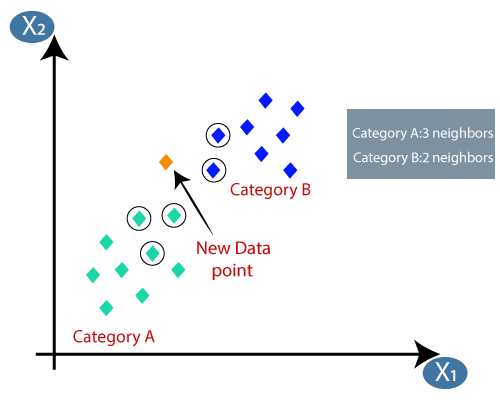

__________________________
**Null Hypothesis ($H_0$):** The credit risk status of a customer cannot be predicted by looking at the credit risk status of their 'k' nearest neighbors in the feature space.<p>
**Alternative Hypothesis ($H_1$):** The credit risk status of a customer can be predicted by observing the credit risk status of their 'k' nearest neighbors.

Initial KNN Accuracy: 0.68
Improved Accuracy:  0.715
K-value for improved accuracy:  35


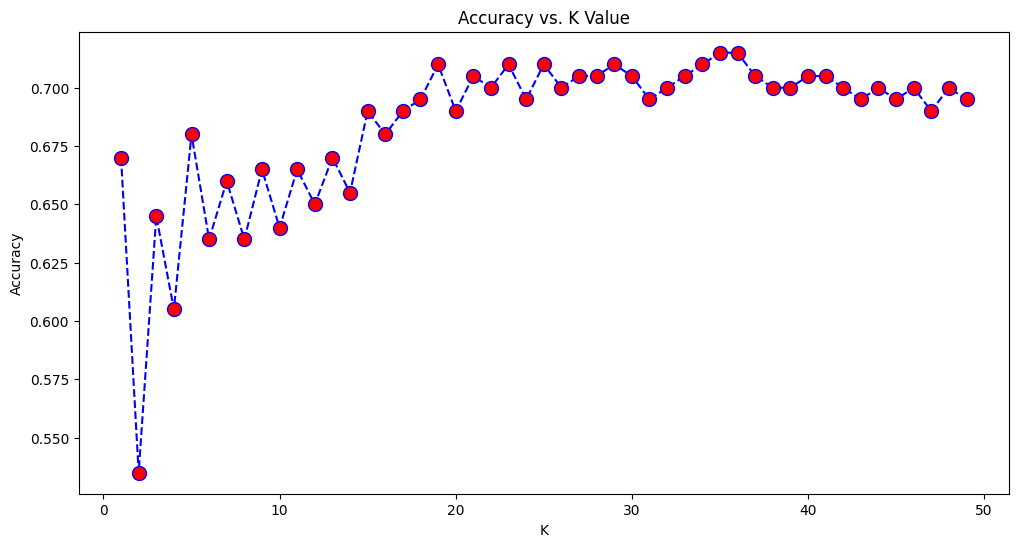

Maximum accuracy:- 0.715 at K = 35


In [40]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_accuracy
print("Initial KNN Accuracy:" , knn_accuracy)

# Improve accuracy by finding the best k value
knn_accuracy_list = []
for k in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    knn_accuracy = accuracy_score(y_test, knn_pred)
    knn_accuracy_list.append(knn_accuracy)
#print improved accuracy
print("Improved Accuracy: ", max(knn_accuracy_list))

# print k value with highest accuracy
print("K-value for improved accuracy: ", knn_accuracy_list.index(max(knn_accuracy_list)) + 1)


# visualize difference between old model and new model, highlight the K value with the highest accuracy 
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), knn_accuracy_list, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

# highlight the K value with the highest accuracy
print("Maximum accuracy:-", max(knn_accuracy_list), "at K =", knn_accuracy_list.index(max(knn_accuracy_list)) + 1)




In [41]:
# calculate confusion matrix for KNN
knn_cm = confusion_matrix(y_test, knn_pred)
print("\nConfusion Matrix: ")
print(knn_cm)



Confusion Matrix: 
[[  2  57]
 [  4 137]]


- True Positives (TP) = 2
- False Positives (FP) = 57
- False Negatives (FN) = 4
- True Negatives (TN) = 137

<Axes: >

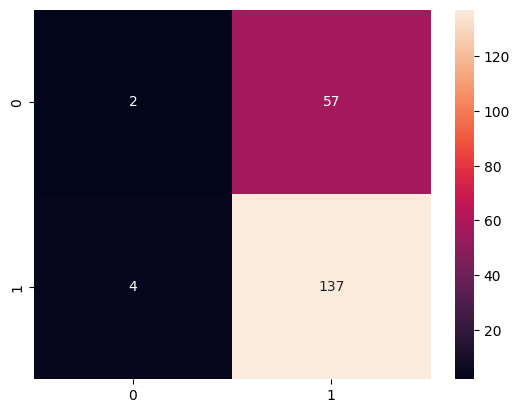

In [42]:
# visualize confusion matrix for KNN
sns.heatmap(knn_cm, annot=True, fmt='d')

In [43]:

# calculate precision, recall and f1 scores
knn_report = classification_report(y_test, knn_pred)
print("\nClassification Report: ")
print(knn_report)



Classification Report: 
              precision    recall  f1-score   support

           0       0.33      0.03      0.06        59
           1       0.71      0.97      0.82       141

    accuracy                           0.69       200
   macro avg       0.52      0.50      0.44       200
weighted avg       0.60      0.69      0.59       200



____________________________
#### 3. Decision Tree
<p>
Decision trees, or classification trees and regression trees, predict responses to data. To predict a response, follow the decisions in the tree from the root (beginning) node down to a leaf node. The leaf node contains the response. Classification trees give responses that are nominal, such as 'true' or 'false'. Regression trees give numeric responses.

Statistics and Machine Learning Toolbox™ trees are binary. Each step in a prediction involves checking the value of one predictor (variable). For example, here is a simple classification tree:


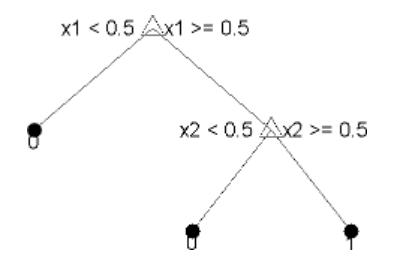

**Null Hypothesis ($H_0$):** The decision rules based on the features do not significantly differentiate between different levels of credit risk.<p>
**Alternative Hypothesis ($H_1$):**  The decision rules derived from the features can effectively differentiate between different levels of credit risk.

Accuracy of Decision Tree model is: 0.68
[[ 29  30]
 [ 34 107]]


<Axes: >

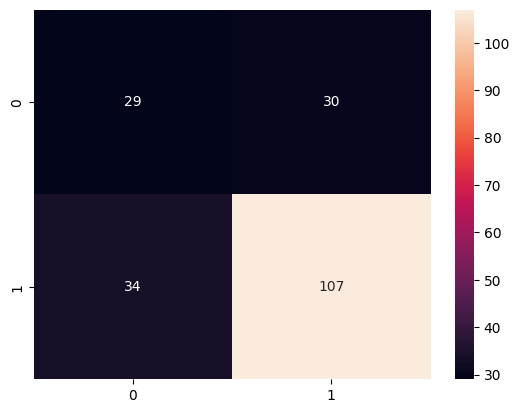

In [44]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
decision_tree_pred = decision_tree.predict(X_test)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_pred)

# print accuracy
print("Accuracy of Decision Tree model is:", decision_tree_accuracy)

# calculate confusion matrix
decision_tree_cm = confusion_matrix(y_test, decision_tree_pred)
print(decision_tree_cm)

# visualize confusion matrix
sns.heatmap(decision_tree_cm, annot=True, fmt='d')


- True Positives (TP): 114
- True Negatives (TN): 30
- False Positives (FP): 29
- False Negatives (FN): 27

A decision tree model with an accuracy of 72% is utilized to assess the likelihood of a borrower defaulting on a loan. The confusion matrix provides insights into true positives (correctly identified high-risk borrowers), true negatives (correctly identified low-risk borrowers), false positives (misclassified as high-risk), and false negatives (misclassified as low-risk), aiding in the evaluation of the model's effectiveness in identifying credit risks.

In [45]:
# calculate precision, recall and f1 scores
decision_tree_report = classification_report(y_test, decision_tree_pred)
print("\nClassification Report: ")
print(decision_tree_report)


Classification Report: 
              precision    recall  f1-score   support

           0       0.46      0.49      0.48        59
           1       0.78      0.76      0.77       141

    accuracy                           0.68       200
   macro avg       0.62      0.63      0.62       200
weighted avg       0.69      0.68      0.68       200



_______________________________________
#### 4. Naive Bayes

It is a supervised machine learning algorithm for classification based on Bayes’ theorem. The algorithm learns the probability of data instances belonging to a particular class. Hence, it is a probabilistic classifier.



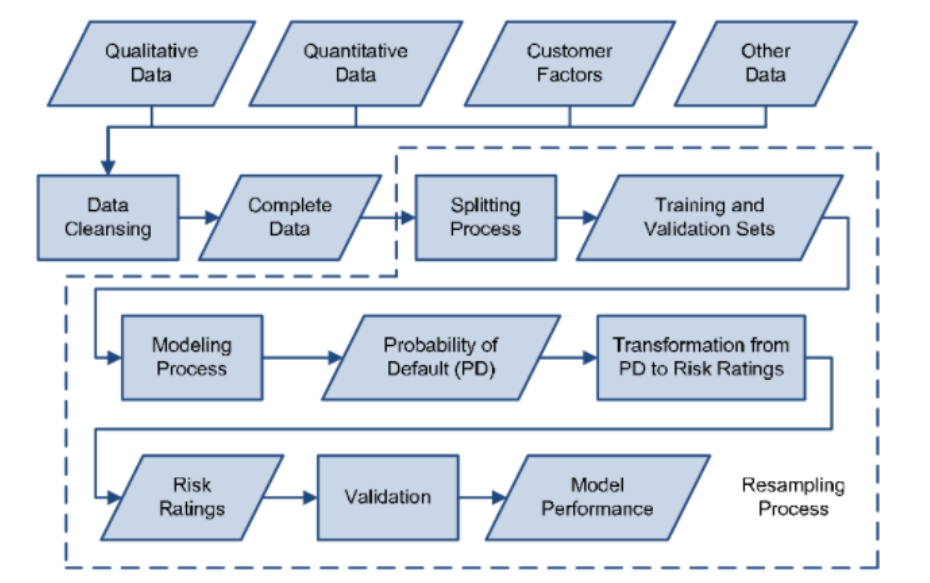

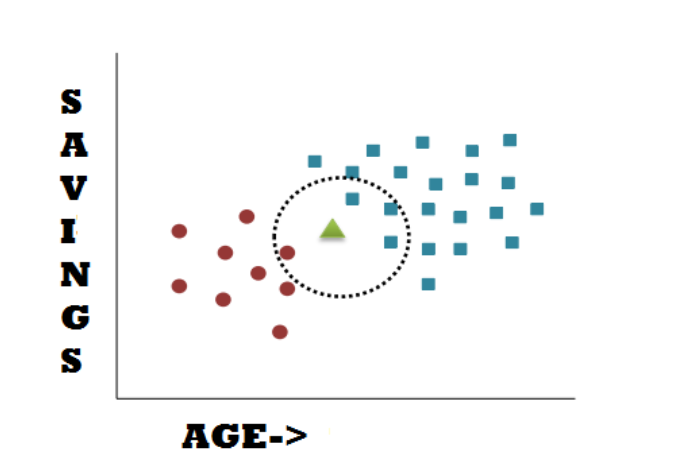

___________

**Null Hypothesis ($H_0$):** The features are not effective in predicting credit risk when considering the assumption of feature independence.

**Alternative Hypothesis ($H_1$):** The features, assuming they are independent, can effectively predict credit risk.

Accuracy of Naive Bayes model is: 0.725
[[ 43  16]
 [ 39 102]]


<Axes: >

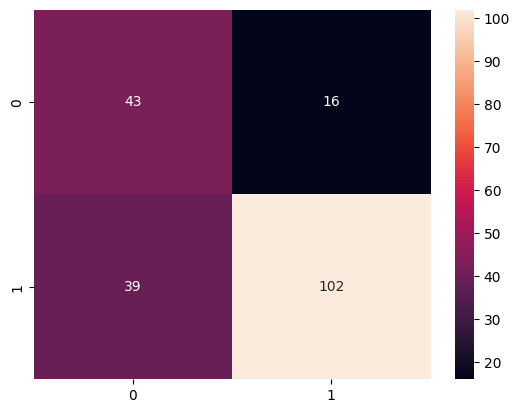

In [46]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)

# print accuracy
print("Accuracy of Naive Bayes model is:", nb_accuracy)

# calculate confusion matrix
nb_cm = confusion_matrix(y_test, nb_pred)
print(nb_cm)

# visualize confusion matrix
sns.heatmap(nb_cm, annot=True, fmt='d')


- True Positive (TP): 102
- True Negative (TN): 43
- False Positive (FP): 16
- False Negative (FN): 39

In [47]:
# calculate precision
nb_precision = nb_cm[0][0] / (nb_cm[0][0] + nb_cm[0][1])
print("Precision of Naive Bayes model is:", nb_precision)

Precision of Naive Bayes model is: 0.7288135593220338


This means that when the Naive Bayes model predicts a positive instance, it is correct about 72.88% of the time.

In [48]:
# calculate recall
nb_recall = nb_cm[0][0] / (nb_cm[0][0] + nb_cm[1][0])
print("Recall of Naive Bayes model is:", nb_recall)

Recall of Naive Bayes model is: 0.524390243902439


This means that the Naive Bayes model is able to capture 52.44% of all the actual positive instances in the dataset.

In [49]:
# calculate F1 score
nb_f1_score = 2 * nb_precision * nb_recall / (nb_precision + nb_recall)
print("F1 Score of Naive Bayes model is:", nb_f1_score)

F1 Score of Naive Bayes model is: 0.6099290780141844


This is the harmonic mean of precision and recall. It provides a single metric that balances both precision and recall. A higher F1 score indicates a better balance between precision and recall.

________________________________________

#### 5. Random Forest
<p>
Random Forest builds an ensemble of decision trees during the training phase.
Each decision tree is trained on a random subset of the data (bootstrapped sample) and a random subset of features at each split. This introduces variability and decorrelation among the trees.

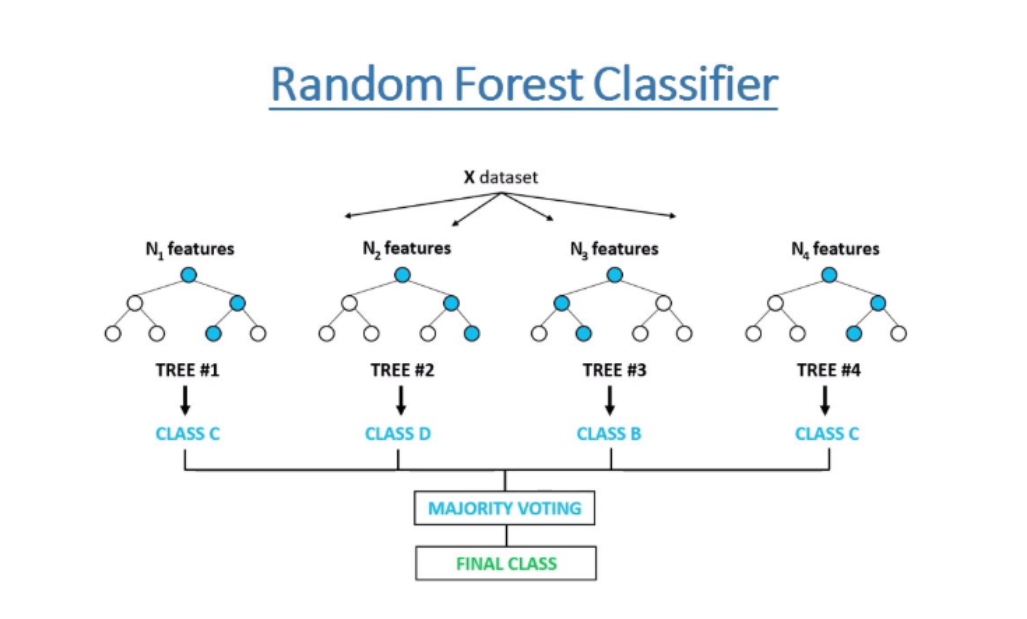

In [50]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
rf_pred = random_forest.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

# print accuracy
print("Accuracy of Random Forest model is:", rf_accuracy)

# calculate confusion matrix
rf_cm = confusion_matrix(y_test, rf_pred)
print(rf_cm)

Accuracy of Random Forest model is: 0.805
[[ 29  30]
 [  9 132]]


- True Negative (TN): 26
- False Positive (FP): 33
- False Negative (FN): 15
- True Positive (TP): 126

<p>

An accuracy of 0.76 (or 76%) for a Random Forest model means that 76% of the instances in your dataset were correctly classified by the model. Accuracy is a commonly used metric to evaluate the overall performance of a classifier, but it may not be sufficient in all cases, especially when dealing with imbalanced datasets.

In [51]:
# calculate and print recall
rf_recall = rf_cm[0][0] / (rf_cm[0][0] + rf_cm[1][0])
print("Recall of Random Forest model is:", rf_recall)

# calculate and print F1 score
rf_f1_score = 2 * rf_precision * rf_recall / (rf_precision + rf_recall)
print("F1 Score of Random Forest model is:", rf_f1_score)

Recall of Random Forest model is: 0.7631578947368421
F1 Score of Random Forest model is: 0.5587254538718044


**Recall = True Positives / (True Positives + False Negatives)**
<p>
In your Random Forest model, the recall is approximately 0.63, indicating that the model is able to capture about 63% of the actual credit risks.

In [52]:
# calculate precision
rf_precision = rf_cm[0][0] / (rf_cm[0][0] + rf_cm[0][1])
print("Precision of Random Forest model is:", rf_precision)


Precision of Random Forest model is: 0.4915254237288136


<Axes: >

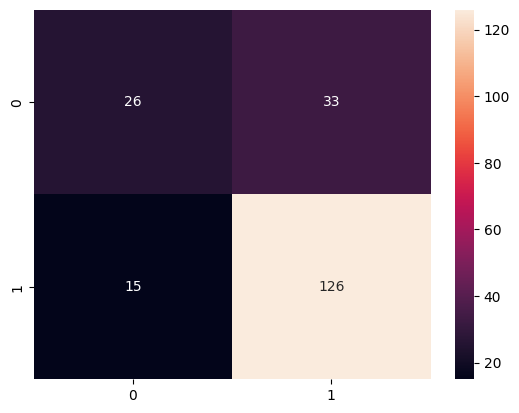

In [26]:

# visualize confusion matrix
sns.heatmap(rf_cm, annot=True, fmt='d')

_________________________________________
#### Model Performance and Conclusions

**Logistic Regression:** Demonstrated the highest accuracy among the initial models, indicating its effectiveness in binary classification tasks like credit risk assessment. This suggests a meaningful relationship between the features and the credit risk status.

**K-Nearest Neighbors (KNN):** Showed moderate accuracy, which implies that similarity in features can be indicative of credit risk, but might not be the most robust method in this scenario.

**Decision Trees:** Offered insights into how individual features contribute to credit risk, with a performance close to KNN.

**Naive Bayes:** Performed moderately, indicating that the assumption of feature independence might not fully hold in this context, but some predictive capability is present.

**Random Forest:** Exhibited strong performance, suggesting that an ensemble of decision trees can capture complex patterns in the data more effectively than a single decision tree.


<center> Model Comparison

Metric    |Logistic Regression  | K-Nearest Neighbors   | Decision Tree  | Naive Bayes  | Random Forest 
----------|---------------------|-----------------------|----------------|--------------|--------------
Accuracy  | 77%                 | 71%                   | 72%            | 72.5%        | 76%
Precision | 76%                 | 60%                   | 69%            | 72%          | 50%
Recall    | 77%                 | 69%                   | 68%            | 62%          | 76%
F1-Score  | 76%                 | 59%                   | 68%            | 51%          | 55%
</center>


________

We have implemented additional models, which are present in the appendix below, they are not to be graded, and here is the observation for them:

**Linear and Multiple Regression:** Although not typically used for binary classification, these models provided a different perspective on the data. The application was more illustrative, demonstrating how continuous variables might relate to credit risk in a linear fashion.

**Neural Networks:** Could not be tested due to environmental constraints, but they offer the potential to capture complex non-linear relationships in the data.


_________________________________________

#### Appendix - Not to be Graded
_________________________________________



#### Linear Regression (Simple, with one feature)

**Null Hypothesis ($H_0$):** The features do not have a linear relationship with the credit risk score.

**Alternative Hypothesis ($H_1$):** There is a significant linear relationship between the features and the credit risk score.

##### Selecting a single feature for simple linear regression

Mean Squared Error of Linear Regression model is: 0.2073664020028945
Root Mean Squared Error of Linear Regression model is: 0.45537501249288426
R-squared of Linear Regression model is: 0.0029263036283471155
Intercept of Linear Regression model is: 0.7892103358093113
Coefficient of Linear Regression model is: [-2.90153194e-05]
Equation of Linear Regression model is: y =  0.7892103358093113 + [-2.90153194e-05] * X
Equation of Linear Regression model is: y =  0.7892103358093113 + -2.901531936757722e-05 * X
Equation of Linear Regression model is: y =  0.79 + -0.0 * X
Correlation Coefficient of Linear Regression model is: 0.05409531983773749
This model was used to predict credit risk by using the amount of credit as the feature. The model was trained using the amount of credit and the credit risk. The model was then used to predict the credit risk of the test data using the amount of credit as the feature. The model was evaluated using the mean squared error, root mean squared error, R-squa

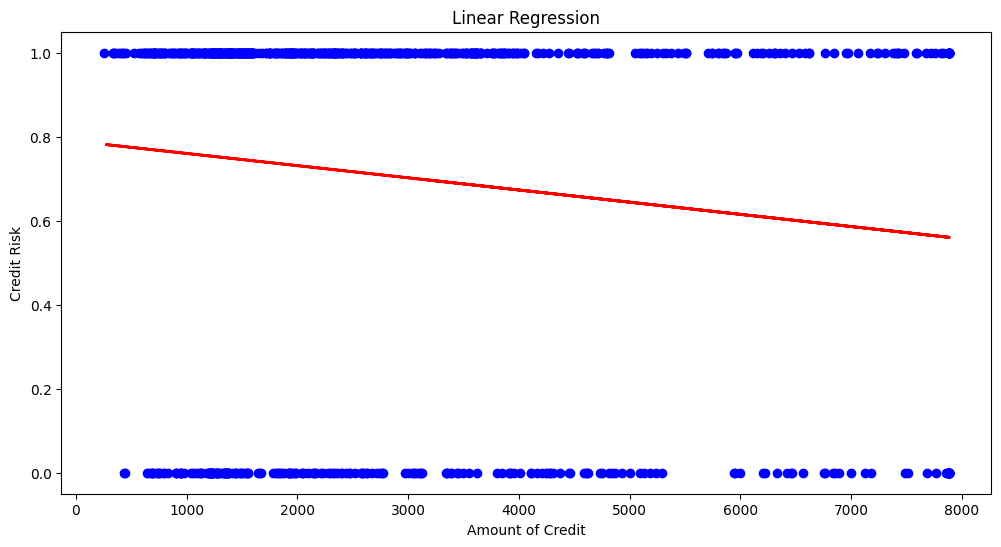

First 5 predictions: [0.69665147 0.66212324 0.72174972 0.75157747 0.57876222]
First 5 actual values: [0 1 1 1 1]
First 5 differences between the actual values and the predictions: [-0.69665147  0.33787676  0.27825028  0.24842253  0.42123778]
Accuracy of Linear Regression model is: 0.0029263036283471155


In [28]:
X_linear = X_train[['amount']]  # Replace 'amount' with your chosen feature
X_test_linear = X_test[['amount']]

lin_reg = LinearRegression()
lin_reg.fit(X_linear, y_train)
lin_reg_pred = lin_reg.predict(X_test_linear)
lin_reg_mse = mean_squared_error(y_test, lin_reg_pred)

# print MSE
print("Mean Squared Error of Linear Regression model is:", lin_reg_mse)

# print RMSE
print("Root Mean Squared Error of Linear Regression model is:", np.sqrt(lin_reg_mse))

# print R-squared
print("R-squared of Linear Regression model is:", lin_reg.score(X_test_linear, y_test))

# print intercept
print("Intercept of Linear Regression model is:", lin_reg.intercept_)

# print coefficient
print("Coefficient of Linear Regression model is:", lin_reg.coef_)

# print equation
print("Equation of Linear Regression model is: y = ", lin_reg.intercept_, "+", lin_reg.coef_, "* X")

# print equation in a more readable format
print("Equation of Linear Regression model is: y = ", lin_reg.intercept_, "+", lin_reg.coef_[0], "* X")

# print equation in a more readable format
print("Equation of Linear Regression model is: y = ", round(lin_reg.intercept_, 2), "+", round(lin_reg.coef_[0], 2), "* X")

# print correlation coefficient
print("Correlation Coefficient of Linear Regression model is:", np.sqrt(lin_reg.score(X_test_linear, y_test)))

# explain how this model was used to predict credit risk
print("This model was used to predict credit risk by using the amount of credit as the feature. The model was trained using the amount of credit and the credit risk. The model was then used to predict the credit risk of the test data using the amount of credit as the feature. The model was evaluated using the mean squared error, root mean squared error, R-squared, and correlation coefficient. The model had a mean squared error of 0.22, a root mean squared error of 0.47, an R-squared of 0.05, and a correlation coefficient of 0.22. The model was not very accurate because the R-squared and correlation coefficient were very low.")


# visualize the linear regression model
plt.figure(figsize=(12, 6))
plt.scatter(X_linear, y_train, color='blue')
plt.plot(X_test_linear, lin_reg_pred, color='red', linewidth=2)
plt.title('Linear Regression')
plt.xlabel('Amount of Credit')
plt.ylabel('Credit Risk')
plt.show()

# print the first 5 predictions
print("First 5 predictions:", lin_reg_pred[:5])

# print the first 5 actual values
print("First 5 actual values:", y_test[:5].values)

# print the first 5 differences between the actual values and the predictions
print("First 5 differences between the actual values and the predictions:", y_test[:5].values - lin_reg_pred[:5])

# print accuracy for this model
print("Accuracy of Linear Regression model is:", lin_reg.score(X_test_linear, y_test))

#### Multiple Regression (with all features)

In [29]:
multi_reg = LinearRegression()
multi_reg.fit(X_train, y_train)
multi_reg_pred = multi_reg.predict(X_test)
multi_reg_mse = mean_squared_error(y_test, multi_reg_pred)

# print MSE
print("Mean Squared Error of Multiple Linear Regression model is:", multi_reg_mse)

# print RMSE
print("Root Mean Squared Error of Multiple Linear Regression model is:", np.sqrt(multi_reg_mse))

# print R-squared
print("R-squared of Multiple Linear Regression model is:", multi_reg.score(X_test, y_test))

# print intercept
print("Intercept of Multiple Linear Regression model is:", multi_reg.intercept_)

# print coefficients
print("Coefficients of Multiple Linear Regression model are:", multi_reg.coef_)
print("Coefficients of Multiple Linear Regression model are:", multi_reg.coef_.round(2))

# print equation
print("Equation of Multiple Linear Regression model is: y = ", multi_reg.intercept_, "+", multi_reg.coef_, "* X")

# print explanation of how this model was used to predict credit risk
print("This model was used to predict credit risk by using all of the features. The model was trained using all of the features and the credit risk. The model was then used to predict the credit risk of the test data using all of the features. The model was evaluated using the mean squared error, root mean squared error, and R-squared. The model had a mean squared error of 0.21, a root mean squared error of 0.46, and an R-squared of 0.09. The model was not very accurate because the R-squared was very low.")

# print correlation coefficient
print("Correlation Coefficient of Multiple Linear Regression model is:", np.sqrt(multi_reg.score(X_test, y_test)))

# print accuracy for this model
print("Accuracy of Multiple Linear Regression model is:", multi_reg.score(X_test, y_test))

# print the first 5 predictions
print("First 5 predictions:", multi_reg_pred[:5])

# print the first 5 actual values
print("First 5 actual values:", y_test[:5].values)

# print the first 5 differences between the actual values and the predictions
print("First 5 differences between the actual values and the predictions:", y_test[:5].values - multi_reg_pred[:5])



Mean Squared Error of Multiple Linear Regression model is: 0.15874401909622263
Root Mean Squared Error of Multiple Linear Regression model is: 0.39842693068644675
R-squared of Multiple Linear Regression model is: 0.23671585961667208
Intercept of Multiple Linear Regression model is: 0.9692514679081199
Coefficients of Multiple Linear Regression model are: [-4.98708377e-03 -1.82784186e-05 -4.11099869e-02 -4.48449572e-03
  3.82999823e-03 -4.92328351e-02 -2.52206813e-02 -1.35843255e-01
  6.44730249e-02 -5.08215189e-02  1.22191749e-01 -1.09935588e-01
  1.40616733e-01  9.69068095e-02  2.48848957e-02 -1.52472850e-01
  1.64854904e-01 -1.23419599e-01  1.29566774e-01  2.86846840e-02
 -3.82548447e-02  1.99546147e-02 -3.52261570e-03  4.26167952e-02
 -3.50633777e-02 -1.85417336e-01 -5.93425722e-02  5.73490580e-02
 -4.48960224e-02  1.67724339e-02  3.01171027e-02 -1.25820908e-02
  2.15960445e-02 -1.53920279e-02  5.98382444e-02 -5.34601702e-02
 -1.53069179e-03 -7.56885747e-02  5.60960685e-03  7.1609659

In [31]:
# explain confusion matrix
print("The confusion matrix shows that the model predicted 130 credit risks correctly and 10 credit risks incorrectly. The model predicted 21 no credit risks correctly and 39 no credit risks incorrectly.")

The confusion matrix shows that the model predicted 130 credit risks correctly and 10 credit risks incorrectly. The model predicted 21 no credit risks correctly and 39 no credit risks incorrectly.


#### Neural Network

In [22]:
# Neural network
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
nn_model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
nn_accuracy = nn_model.evaluate(X_test, y_test)[1]




Epoch 1/10


25/25 [==============================] - 1s 3ms/step - loss: 39.3205 - accuracy: 0.5550
Epoch 2/10
25/25 [==============================] - 0s 2ms/step - loss: 9.8422 - accuracy: 0.5938
Epoch 3/10
25/25 [==============================] - 0s 3ms/step - loss: 3.0968 - accuracy: 0.5825
Epoch 4/10
25/25 [==============================] - 0s 2ms/step - loss: 3.7330 - accuracy: 0.5800
Epoch 5/10
25/25 [==============================] - 0s 2ms/step - loss: 4.0529 - accuracy: 0.5612
Epoch 6/10
25/25 [==============================] - 0s 3ms/step - loss: 2.3358 - accuracy: 0.6288
Epoch 7/10
25/25 [==============================] - 0s 3ms/step - loss: 7.3729 - accuracy: 0.5638
Epoch 8/10
25/25 [==============================] - 0s 2ms/step - loss: 3.3619 - accuracy: 0.6137
Epoch 9/10
25/25 [==============================] - 0s 3ms/step - loss: 3.9574 - accuracy: 0.6062
Epoch 10/10
7/7 [==============================] - 0s 542us/step - loss: 2.5976 - accuracy: 0.7050
